In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading training data
df_train = pd.read_csv("Train_food.csv")
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
# Loading testing data
df_test = pd.read_csv("test_food.csv")
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
df_train.shape

(12690, 9)

There are 12690 rows and 9 columns in training data

In [5]:
df_test.shape

(4231, 8)

There are 4231 rows and 8 columns in testing data

In [6]:
# Title 

In [7]:
df_train["TITLE"].value_counts().head(20)

QUICK BITES               4218
CASUAL DINING             3652
None                      1003
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
FINE DINING                308
BAKERY                     302
BEVERAGE SHOP              156
BAR,CASUAL DINING          128
LOUNGE                      98
BAKERY,QUICK BITES          92
BAR                         91
FOOD COURT                  78
CASUAL DINING,CAFÉ          56
MESS                        53
KIOSK                       53
BAKERY,DESSERT PARLOR       51
PUB                         50
SWEET SHOP,QUICK BITES      48
Name: TITLE, dtype: int64

Creating lists qb,cd,None,cafe,dp,bar,fd,bakery,bs,lounge

In [8]:
qb = []
cd = []
none = []
cafe = []
dp = []
bar = []
fd = []
bake =[]
bs = []
lounge =[]

def f(l,s):
    for data in df_train["TITLE"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(qb,"QUICK BITES")
f(cd,"CASUAL DINING")
f(none,"None")
f(cafe,"CAFÉ")
f(dp,"DESSERT PARLOR")
f(bar,"BAR")
f(fd,"FINE DINING")
f(bake,"BAKERY")
f(bs,"BEVERAGE SHOP")
f(lounge,"LOUNGE")

qb = pd.DataFrame(qb,columns=['qb'])
cd = pd.DataFrame(cd,columns=['cd'])
none = pd.DataFrame(none,columns=['none'])
cafe = pd.DataFrame(cafe,columns=['cafe'])
dp = pd.DataFrame(dp,columns=['dp'])
bar = pd.DataFrame(bar,columns=['bar'])
fd = pd.DataFrame(fd,columns=['fd'])
bake = pd.DataFrame(bake,columns=['bake'])
bs = pd.DataFrame(bs,columns=['bs'])
lounge = pd.DataFrame(lounge,columns=['lounge'])

df_train = pd.concat([qb,cd,none,cafe,dp,bar,fd,bake,bs,lounge,df_train],axis=1)
df_train.drop("TITLE",axis=1,inplace=True)
df_train.head()



,qb,cd,none,cafe,dp,bar,fd,bake,bs,lounge,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,0,1,0,0,0,1,0,0,0,0,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,0,1,0,0,0,0,0,0,0,0,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,1,0,0,0,0,0,0,0,0,0,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,0,0,0,0,1,0,0,0,0,0,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [9]:
qb = []
cd = []
none = []
cafe = []
dp = []
bar = []
fd = []
bake =[]
bs = []
lounge =[]

def f(l,s):
    for data in df_test["TITLE"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(qb,"QUICK BITES")
f(cd,"CASUAL DINING")
f(none,"None")
f(cafe,"CAFÉ")
f(dp,"DESSERT PARLOR")
f(bar,"BAR")
f(fd,"FINE DINING")
f(bake,"BAKERY")
f(bs,"BEVERAGE SHOP")
f(lounge,"LOUNGE")

qb = pd.DataFrame(qb,columns=['qb'])
cd = pd.DataFrame(cd,columns=['cd'])
none = pd.DataFrame(none,columns=['none'])
cafe = pd.DataFrame(cafe,columns=['cafe'])
dp = pd.DataFrame(dp,columns=['dp'])
bar = pd.DataFrame(bar,columns=['bar'])
fd = pd.DataFrame(fd,columns=['fd'])
bake = pd.DataFrame(bake,columns=['bake'])
bs = pd.DataFrame(bs,columns=['bs'])
lounge = pd.DataFrame(lounge,columns=['lounge'])

df_test = pd.concat([qb,cd,none,cafe,dp,bar,fd,bake,bs,lounge,df_test],axis=1)
df_test.drop("TITLE",axis=1,inplace=True)
df_test.head()



,qb,cd,none,cafe,dp,bar,fd,bake,bs,lounge,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,0,1,0,0,0,0,0,0,0,0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,1,0,0,0,0,0,0,0,0,0,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,0,1,0,0,0,0,0,0,0,0,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,0,0,1,0,0,0,0,0,0,0,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,1,0,0,0,0,0,0,0,0,0,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [10]:
# Cuisines

In [11]:
df_train["CUISINES"].value_counts().head(20)

South Indian                           532
North Indian                           526
North Indian, Chinese                  501
Fast Food                              286
Chinese                                167
Bakery, Desserts                       148
Bakery                                 148
South Indian, North Indian, Chinese    139
Cafe                                   134
Kerala                                 131
Biryani                                129
Street Food                            121
Chinese, North Indian                  119
South Indian, North Indian             106
North Indian, Mughlai                  102
North Indian, Chinese, Biryani          91
Finger Food                             87
Desserts                                87
North Indian, South Indian, Chinese     87
Ice Cream, Desserts                     81
Name: CUISINES, dtype: int64

In [12]:
si = []
ni = []
chinese = []
ff = []
bakery = []
Cafe = []
kerala =[]
sf = []
biryani = []

def f(l,s):
    for data in df_train["CUISINES"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(si,"South Indian")
f(ni,"North Indian")
f(chinese,"Chinese")
f(Cafe,"Cafe")
f(ff,"Fast Food")
f(kerala,"Kerala")
f(bakery,"Bakery")
f(sf,"Street Food")
f(biryani,"Biryani")

si = pd.DataFrame(si,columns=['si'])
ni = pd.DataFrame(ni,columns=['ni'])
chinese = pd.DataFrame(chinese,columns=['chinese'])
Cafe = pd.DataFrame(Cafe,columns=['Cafe'])
ff = pd.DataFrame(ff,columns=['ff'])
kerala = pd.DataFrame(kerala,columns=['kerala'])
bakery = pd.DataFrame(bakery,columns=['bakery'])
sf = pd.DataFrame(sf,columns=['sf'])
biryani = pd.DataFrame(biryani,columns=['biryani'])

df_train = pd.concat([si,ni,chinese,Cafe,ff,kerala,bakery,sf,biryani,df_train],axis=1)
df_train.drop("CUISINES",axis=1,inplace=True)
df_train.head()

,si,ni,chinese,Cafe,ff,kerala,bakery,sf,biryani,qb,...,bake,bs,lounge,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,0,1,1,0,0,0,0,0,1,0,...,0,0,0,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [13]:
si = []
ni = []
chinese = []
ff = []
bakery = []
Cafe = []
kerala =[]
sf = []
biryani = []

def f(l,s):
    for data in df_test["CUISINES"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(si,"South Indian")
f(ni,"North Indian")
f(chinese,"Chinese")
f(Cafe,"Cafe")
f(ff,"Fast Food")
f(kerala,"Kerala")
f(bakery,"Bakery")
f(sf,"Street Food")
f(biryani,"Biryani")

si = pd.DataFrame(si,columns=['si'])
ni = pd.DataFrame(ni,columns=['ni'])
chinese = pd.DataFrame(chinese,columns=['chinese'])
Cafe = pd.DataFrame(Cafe,columns=['Cafe'])
ff = pd.DataFrame(ff,columns=['ff'])
kerala = pd.DataFrame(kerala,columns=['kerala'])
bakery = pd.DataFrame(bakery,columns=['bakery'])
sf = pd.DataFrame(sf,columns=['sf'])
biryani = pd.DataFrame(biryani,columns=['biryani'])

df_test = pd.concat([si,ni,chinese,Cafe,ff,kerala,bakery,sf,biryani,df_test],axis=1)
df_test.drop("CUISINES",axis=1,inplace=True)
df_test.head()

,si,ni,chinese,Cafe,ff,kerala,bakery,sf,biryani,qb,...,fd,bake,bs,lounge,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,4085,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,12680,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1411,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,13453,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [14]:
# Time

In [15]:
df_train["TIME"].value_counts().head(15)

11am – 11pm (Mon-Sun)            1415
12noon – 12midnight (Mon-Sun)     469
12noon – 11pm (Mon-Sun)           407
11am – 12midnight (Mon-Sun)       310
10am – 10pm (Mon-Sun)             221
12noon – 1am (Mon-Sun)            197
10am – 11pm (Mon-Sun)             183
7am – 11pm (Mon-Sun)              183
8am – 11pm (Mon-Sun)              175
24 Hours (Mon-Sun)                172
12noon – 11:30pm (Mon-Sun)        156
11am – 10pm (Mon-Sun)             154
11am – 11:30pm (Mon-Sun)          143
11:30am – 11:30pm (Mon-Sun)       138
9am – 11pm (Mon-Sun)              120
Name: TIME, dtype: int64

In [16]:
ms = []
elevenam = []
twelvenoon = []
twentyfour = []
elevenpm = []
tenam = []

def f(l,s):
    for data in df_train["TIME"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(ms,"(Mon-Sun)")
f(elevenam,"11am")
f(twentyfour,"24 Hours")
f(twelvenoon,"12noon")
f(elevenpm,"11pm")
f(tenam,"10am")

ms= pd.DataFrame(ms,columns=["mon-sun"])
elevenam = pd.DataFrame(elevenam,columns=["11am"])
twentyfour = pd.DataFrame(twentyfour,columns=["24"])
twelvenoon = pd.DataFrame(twelvenoon,columns=["12noon"])
elevenpm = pd.DataFrame(elevenpm,columns=['11pm'])
tenam=pd.DataFrame(tenam,columns=['10am'])

df_train = pd.concat([ms,elevenam,twentyfour,twelvenoon,elevenpm,tenam,df_train],axis=1)
df_train.drop("TIME",axis=1,inplace=True)
df_train.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,fd,bake,bs,lounge,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,9438,Thane,Dombivali East,3.6,49 votes,1200
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,13198,Chennai,Ramapuram,4.2,30 votes,1500
2,1,1,0,0,1,0,0,1,1,0,...,0,0,0,0,10915,Chennai,Saligramam,3.8,221 votes,800
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,6346,Mumbai,Bandra West,4.1,24 votes,800
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,15387,Mumbai,Lower Parel,3.8,165 votes,300


In [17]:
ms = []
elevenam = []
twelvenoon = []
twentyfour = []
elevenpm = []
tenam =[]

def f(l,s):
    for data in df_test["TIME"]:
        if data.find(s)==-1:
            l.append(int(0))
        else:
            l.append(int(1))
            
f(ms,"(Mon-Sun)")
f(elevenam,"11am")
f(twentyfour,"24 Hours")
f(twelvenoon,"12noon")
f(elevenpm,"11pm")
f(tenam,"10am")

ms= pd.DataFrame(ms,columns=["mon-sun"])
elevenam = pd.DataFrame(elevenam,columns=["11am"])
twentyfour = pd.DataFrame(twentyfour,columns=["24"])
twelvenoon = pd.DataFrame(twelvenoon,columns=["12noon"])
elevenpm = pd.DataFrame(elevenpm,columns=['11pm'])
tenam = pd.DataFrame(tenam,columns=["10am"])

df_test = pd.concat([ms,elevenam,twentyfour,twelvenoon,elevenpm,tenam,df_test],axis=1)
df_test.drop("TIME",axis=1,inplace=True)
df_test.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,bar,fd,bake,bs,lounge,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,4085,Noida,Sector 18,4.3,564 votes
1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,12680,Mumbai,Grant Road,4.2,61 votes
2,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1411,Mumbai,Marine Lines,3.8,350 votes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,204,Faridabad,NIT,3.8,1445 votes
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,13453,Kochi,Kaloor,3.6,23 votes


In [18]:
# votes

a = df_train["VOTES"].str.split(" ",expand=True)
a.drop(1,axis=1,inplace=True)
f = [df_train,a]
df_train = pd.concat(f,axis=1)
df_train.drop("VOTES",axis=1,inplace=True)
df_train=df_train.rename(columns={0:"votes"})
df_train.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,fd,bake,bs,lounge,RESTAURANT_ID,CITY,LOCALITY,RATING,COST,votes
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,9438,Thane,Dombivali East,3.6,1200,49
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,13198,Chennai,Ramapuram,4.2,1500,30
2,1,1,0,0,1,0,0,1,1,0,...,0,0,0,0,10915,Chennai,Saligramam,3.8,800,221
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,6346,Mumbai,Bandra West,4.1,800,24
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,15387,Mumbai,Lower Parel,3.8,300,165


In [19]:
a = df_test["VOTES"].str.split(" ",expand=True)
a.drop(1,axis=1,inplace=True)
f = [df_test,a]
df_test = pd.concat(f,axis=1)
df_test.drop("VOTES",axis=1,inplace=True)
df_test=df_test.rename(columns={0:"votes"})
df_test.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,bar,fd,bake,bs,lounge,RESTAURANT_ID,CITY,LOCALITY,RATING,votes
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,4085,Noida,Sector 18,4.3,564
1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,12680,Mumbai,Grant Road,4.2,61
2,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1411,Mumbai,Marine Lines,3.8,350
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,204,Faridabad,NIT,3.8,1445
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,13453,Kochi,Kaloor,3.6,23


In [20]:
df_train.dtypes

mon-sun           int64
11am              int64
24                int64
12noon            int64
11pm              int64
10am              int64
si                int64
ni                int64
chinese           int64
Cafe              int64
ff                int64
kerala            int64
bakery            int64
sf                int64
biryani           int64
qb                int64
cd                int64
none              int64
cafe              int64
dp                int64
bar               int64
fd                int64
bake              int64
bs                int64
lounge            int64
RESTAURANT_ID     int64
CITY             object
LOCALITY         object
RATING           object
COST              int64
votes            object
dtype: object

In [21]:
df_train["RATING"].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

In [22]:
# incorrect dtypes - rating

df_train["RATING"].replace('NEW',0,inplace=True)
df_train["RATING"].replace('-',np.nan,inplace=True)
df_train["RATING"]=df_train["RATING"].astype(float)

In [23]:
df_test["RATING"].replace('NEW',0,inplace=True)
df_test["RATING"].replace('-',np.nan,inplace=True)
df_test["RATING"]=df_test["RATING"].astype(float)

In [24]:
# incorrect dtypes - votes

df_train["votes"]=df_train["votes"].astype(float)

In [25]:
df_test["votes"]=df_test["votes"].astype(float)

In [26]:
# checking for null values

df_train.isnull().sum()

mon-sun             0
11am                0
24                  0
12noon              0
11pm                0
10am                0
si                  0
ni                  0
chinese             0
Cafe                0
ff                  0
kerala              0
bakery              0
sf                  0
biryani             0
qb                  0
cd                  0
none                0
cafe                0
dp                  0
bar                 0
fd                  0
bake                0
bs                  0
lounge              0
RESTAURANT_ID       0
CITY              112
LOCALITY           98
RATING            497
COST                0
votes            1204
dtype: int64

In [27]:
print(df_train["CITY"].mode())
print(df_train["LOCALITY"].mode())
print(df_train["RATING"].mean())
print(df_train["votes"].mean())

0    Chennai
dtype: object
0    Gachibowli
dtype: object
3.565955876322484
415.66890127111265


In [28]:
df_train["CITY"].fillna('Chennai',inplace=True)
df_train["LOCALITY"].fillna('Gachibowli',inplace=True)
df_train["RATING"].fillna(3.6,inplace=True)
df_train["votes"].fillna(416,inplace=True)
df_train.isnull().sum()

mon-sun          0
11am             0
24               0
12noon           0
11pm             0
10am             0
si               0
ni               0
chinese          0
Cafe             0
ff               0
kerala           0
bakery           0
sf               0
biryani          0
qb               0
cd               0
none             0
cafe             0
dp               0
bar              0
fd               0
bake             0
bs               0
lounge           0
RESTAURANT_ID    0
CITY             0
LOCALITY         0
RATING           0
COST             0
votes            0
dtype: int64

In [29]:
# null values in testing data

df_test.isnull().sum()

mon-sun            0
11am               0
24                 0
12noon             0
11pm               0
10am               0
si                 0
ni                 0
chinese            0
Cafe               0
ff                 0
kerala             0
bakery             0
sf                 0
biryani            0
qb                 0
cd                 0
none               0
cafe               0
dp                 0
bar                0
fd                 0
bake               0
bs                 0
lounge             0
RESTAURANT_ID      0
CITY              35
LOCALITY          30
RATING           179
votes            402
dtype: int64

In [30]:
print(df_test["CITY"].mode())
print(df_test["LOCALITY"].mode())

0    Bangalore
dtype: object
0      Kakkanad
1    Kukatpally
dtype: object


In [31]:
df_test["CITY"].fillna('Bangalore',inplace=True)
df_test["LOCALITY"].fillna('Kukatpally',inplace=True)
df_test["RATING"].fillna(round(df_test["RATING"].mean(),1),inplace=True)
df_test["votes"].fillna(round(df_test["votes"].mean()),inplace=True)
df_test.isnull().sum()

mon-sun          0
11am             0
24               0
12noon           0
11pm             0
10am             0
si               0
ni               0
chinese          0
Cafe             0
ff               0
kerala           0
bakery           0
sf               0
biryani          0
qb               0
cd               0
none             0
cafe             0
dp               0
bar              0
fd               0
bake             0
bs               0
lounge           0
RESTAURANT_ID    0
CITY             0
LOCALITY         0
RATING           0
votes            0
dtype: int64

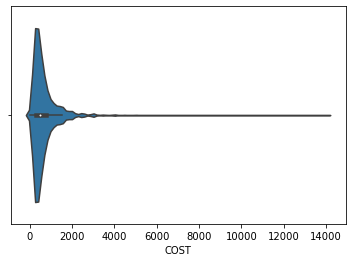

In [32]:
# Univariate anlysis

import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(df_train["COST"])
plt.show()

It is right skewed

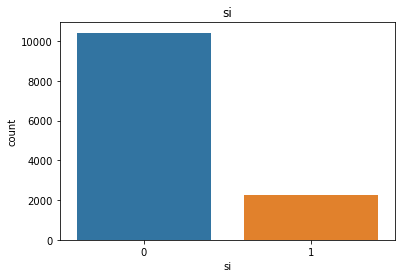

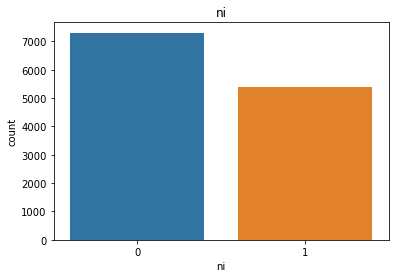

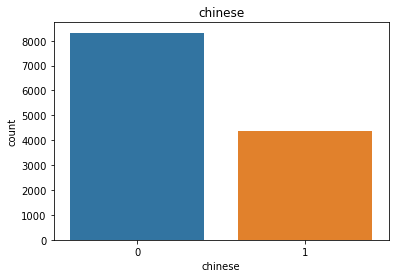

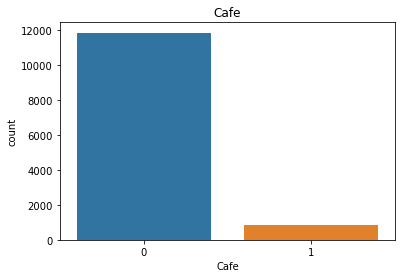

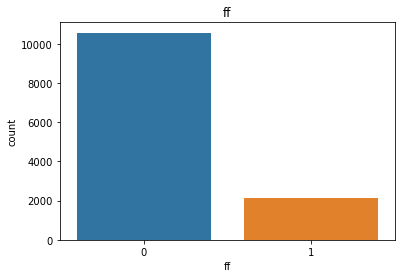

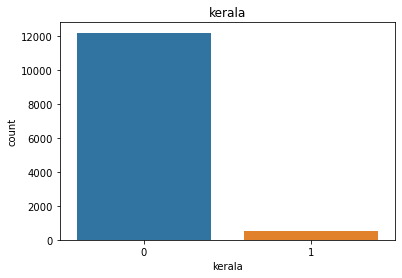

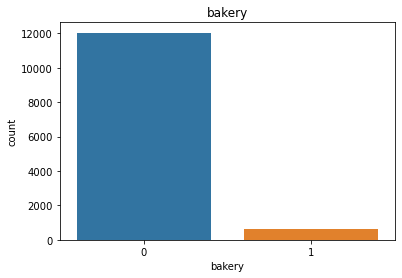

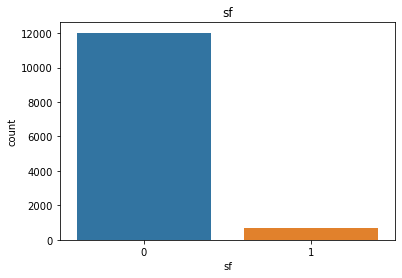

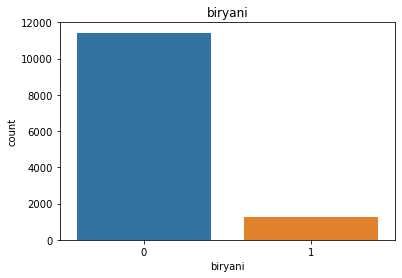

In [33]:
for i in df_train[['si','ni','chinese','Cafe','ff','kerala','bakery','sf','biryani']]:
    plt.title(i)
    sns.countplot(df_train[i])
    plt.show()

North indian restaurents are of highest count followe by chinese

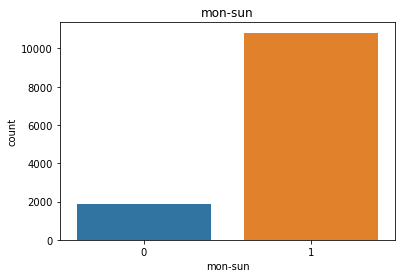

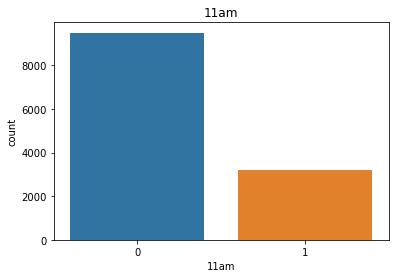

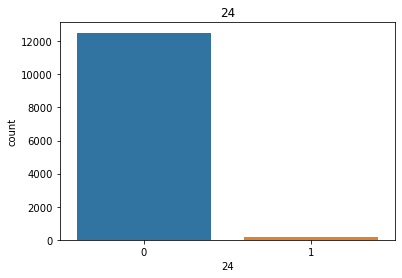

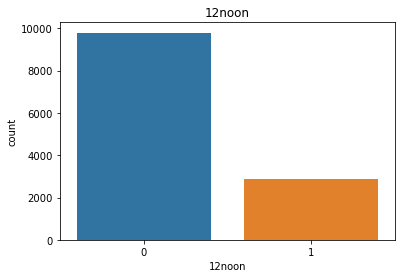

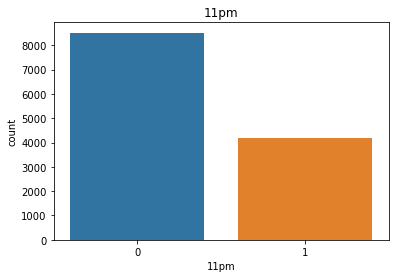

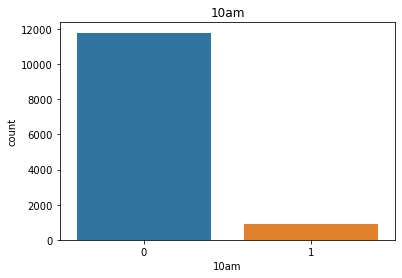

In [34]:
for i in df_train[['mon-sun','11am','24','12noon','11pm','10am']]:
    plt.title(i)
    sns.countplot(df_train[i])
    plt.show()

almost all restaurants are open all days in the week and approx-4000 of them stay open untill 11pm

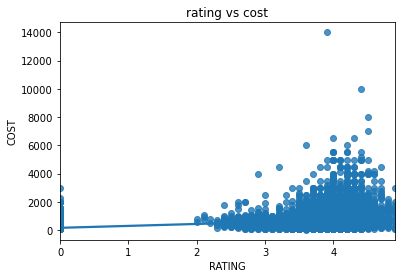

In [35]:
# bivariate analysis

# rating vs cost

plt.title("rating vs cost")
sns.regplot(df_train["RATING"],df_train["COST"])
plt.show()

There is slight increase in cost wrt the rating

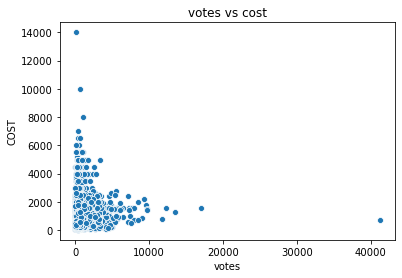

In [36]:
# votes vs cost

plt.title("votes vs cost")
sns.scatterplot(df_train["votes"],df_train["COST"])
plt.show()

Votes and cost shows no particulatr relationship

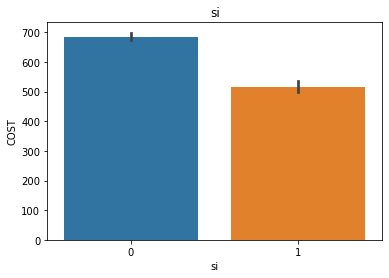

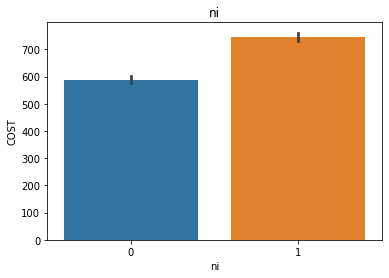

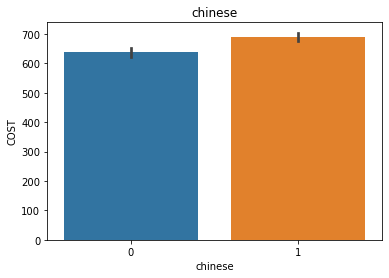

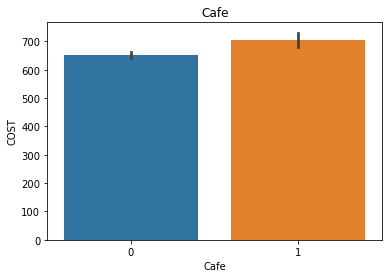

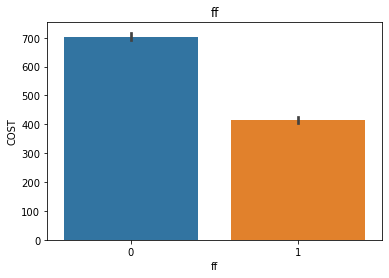

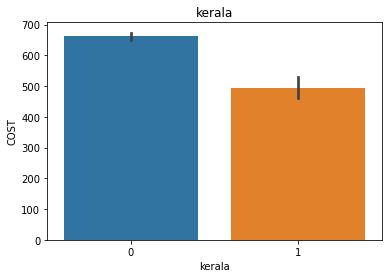

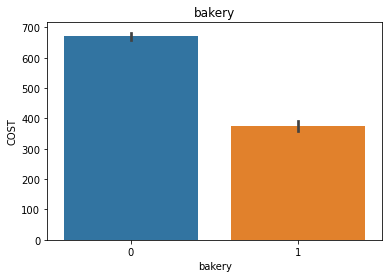

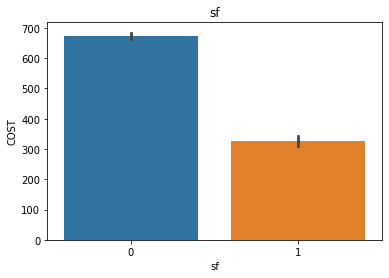

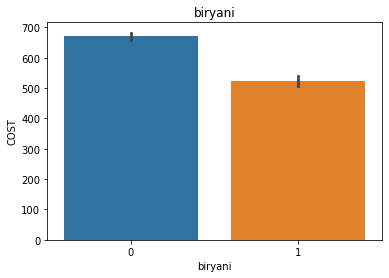

In [37]:
for i in df_train[['si','ni','chinese','Cafe','ff','kerala','bakery','sf','biryani']]:
    plt.title(i)
    sns.barplot(df_train[i],df_train["COST"])
    plt.show()

We see that price varies with the cuisine

north indian and chinese restaurants charge more in comparision to others

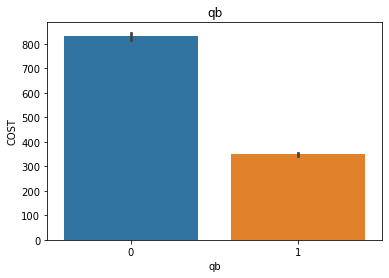

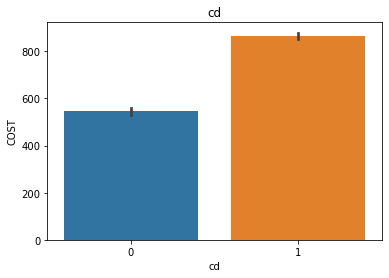

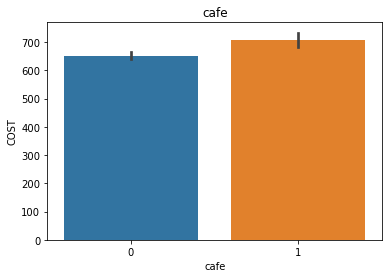

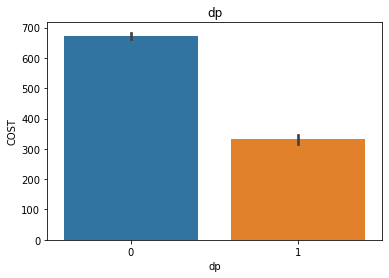

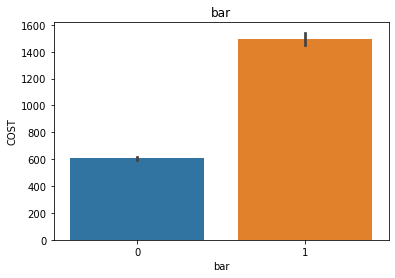

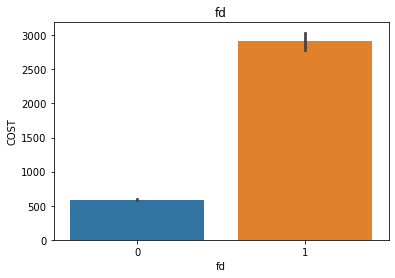

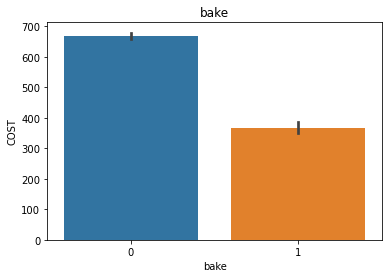

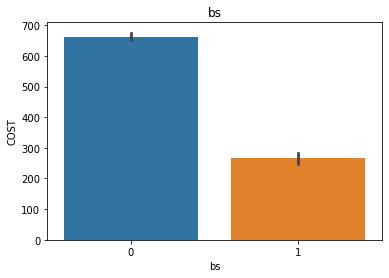

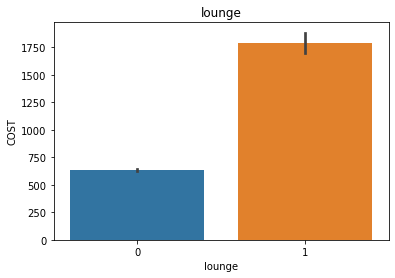

In [38]:
for i in df_train[['qb','cd','cafe','dp','bar','fd','bake','bs','lounge']]:
    plt.title(i)
    sns.barplot(df_train[i],df_train["COST"])
    plt.show()

Cost varies wrt the type of restaurents

casual dining, fibe dining, bar and launge fwtch higher amount 

In [39]:
# Correlation

df_train.corr()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,dp,bar,fd,bake,bs,lounge,RESTAURANT_ID,RATING,COST,votes
mon-sun,1.000000,0.041307,0.041613,-0.074891,0.021456,-0.005359,0.030293,0.041483,0.089447,-0.066682,...,0.001586,-0.039203,-0.023370,0.006870,0.010582,-0.016863,-0.024810,-0.086097,-0.071922,-0.068008
11am,0.041307,1.000000,-0.068793,-0.296904,0.250179,-0.147231,-0.079310,0.010913,0.050922,0.023265,...,0.034560,0.000626,-0.081291,-0.052492,0.035748,-0.002336,-0.016940,-0.084101,-0.076741,-0.051376
24,0.041613,-0.068793,1.000000,-0.064502,-0.083012,-0.032707,0.025408,0.061820,-0.013588,0.025599,...,-0.023652,-0.007564,0.228038,-0.004634,-0.007061,0.001146,-0.012999,0.015763,0.176119,-0.010132
12noon,-0.074891,-0.296904,-0.064502,1.000000,-0.048217,-0.137550,-0.090139,0.083618,0.076199,-0.060293,...,-0.045101,0.129287,0.013915,-0.097848,-0.044459,0.043779,0.026980,0.104052,0.165606,0.129140
11pm,0.021456,0.250179,-0.083012,-0.048217,1.000000,-0.034013,0.014527,0.033888,0.049999,0.017196,...,-0.013711,-0.086107,-0.046323,-0.050171,-0.003485,-0.064618,-0.002863,-0.050057,-0.074235,-0.051871
10am,-0.005359,-0.147231,-0.032707,-0.137550,-0.034013,1.000000,-0.029453,-0.097984,-0.087852,0.070658,...,0.107955,-0.045665,-0.035849,0.158623,0.040787,-0.032525,-0.009392,-0.028780,-0.099373,-0.045699
si,0.030293,-0.079310,0.025408,-0.090139,0.014527,-0.029453,1.000000,0.094536,0.072340,-0.106601,...,-0.103626,-0.065593,-0.007635,-0.091588,-0.061658,-0.049402,0.031500,-0.042100,-0.103042,-0.065743
ni,0.041483,0.010913,0.061820,0.083618,0.033888,-0.097984,0.094536,1.000000,0.428943,-0.172483,...,-0.190901,0.068411,0.028061,-0.170791,-0.117978,0.031592,0.025943,-0.037425,0.124024,0.065069
chinese,0.089447,0.050922,-0.013588,0.076199,0.049999,-0.087852,0.072340,0.428943,1.000000,-0.132066,...,-0.161326,0.024307,-0.032282,-0.126721,-0.098907,0.011709,0.027193,-0.016855,0.039691,0.006080
Cafe,-0.066682,0.023265,0.025599,-0.060293,0.017196,0.070658,-0.106601,-0.172483,-0.132066,1.000000,...,0.012523,-0.039680,-0.039460,0.012679,-0.019213,-0.026032,-0.018921,0.070344,0.020766,0.043513


<function matplotlib.pyplot.show(*args, **kw)>

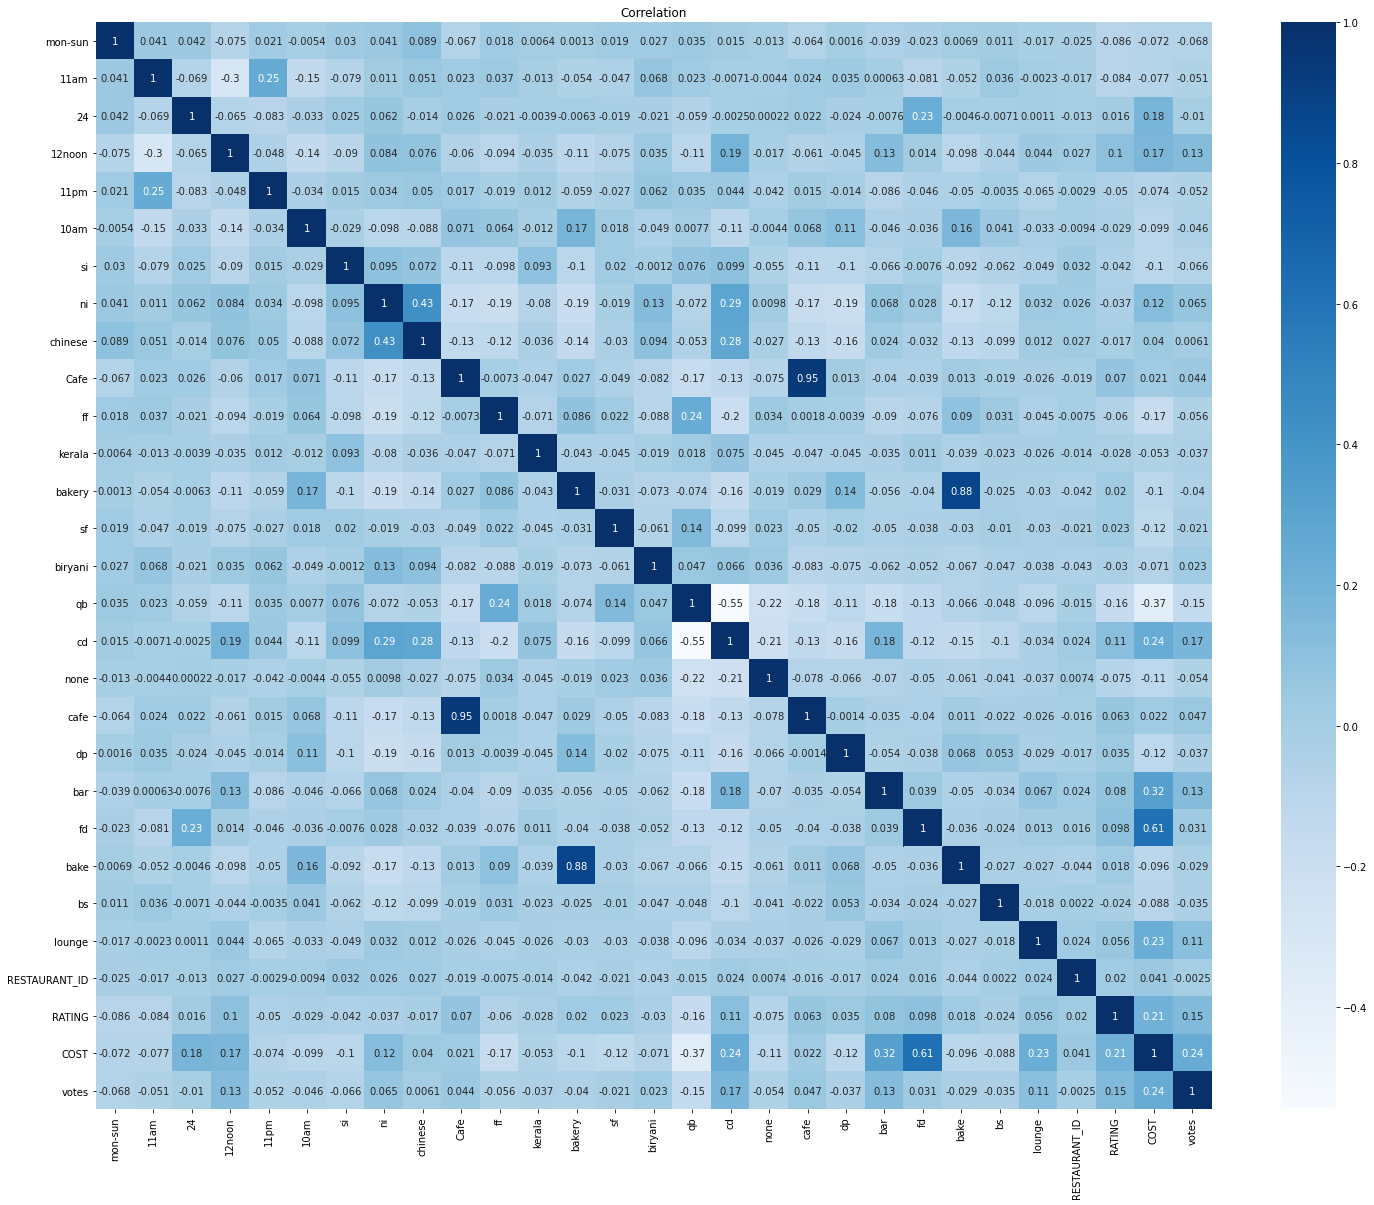

In [40]:
# Visualizing correlation

plt.figure(figsize=(25,20))
plt.title("Correlation")
sns.heatmap(df_train.corr(),annot=True,cmap = 'Blues')
plt.show

In [41]:
# Converting categorical to numerical data in training data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df_train[['CITY','LOCALITY']] = df_train[['CITY','LOCALITY']].apply(label_encoder.fit_transform)
df_train.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,fd,bake,bs,lounge,RESTAURANT_ID,CITY,LOCALITY,RATING,COST,votes
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,9438,320,285,3.6,1200,49.0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,13198,67,1046,4.2,1500,30.0
2,1,1,0,0,1,0,0,1,1,0,...,0,0,0,0,10915,67,1101,3.8,800,221.0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,6346,222,136,4.1,800,24.0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,15387,222,620,3.8,300,165.0


In [42]:
# testing data

df_test[['CITY','LOCALITY']] = df_test[['CITY','LOCALITY']].apply(label_encoder.fit_transform)
df_test.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,bar,fd,bake,bs,lounge,RESTAURANT_ID,CITY,LOCALITY,RATING,votes
0,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,4085,110,662,4.3,564.0
1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,12680,96,221,4.2,61.0
2,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1411,96,411,3.8,350.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,204,41,456,3.8,1445.0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,13453,78,300,3.6,23.0


In [43]:
# Setting restaurent id as index

df_train = df_train.set_index(df_train["RESTAURANT_ID"])
df_train.drop("RESTAURANT_ID",axis=1,inplace=True)
df_train.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,bar,fd,bake,bs,lounge,CITY,LOCALITY,RATING,COST,votes
RESTAURANT_ID,,,,,,,,,,,,,,,,,,,,,
9438,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,320,285,3.6,1200,49.0
13198,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,67,1046,4.2,1500,30.0
10915,1,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,67,1101,3.8,800,221.0
6346,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,222,136,4.1,800,24.0
15387,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,222,620,3.8,300,165.0


In [44]:
# Doing the same on testing data

df_test = df_test.set_index(df_test["RESTAURANT_ID"])
df_test.drop("RESTAURANT_ID",axis=1,inplace=True)
df_test.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,dp,bar,fd,bake,bs,lounge,CITY,LOCALITY,RATING,votes
RESTAURANT_ID,,,,,,,,,,,,,,,,,,,,,
4085,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,110,662,4.3,564.0
12680,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,96,221,4.2,61.0
1411,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,96,411,3.8,350.0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41,456,3.8,1445.0
13453,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,78,300,3.6,23.0


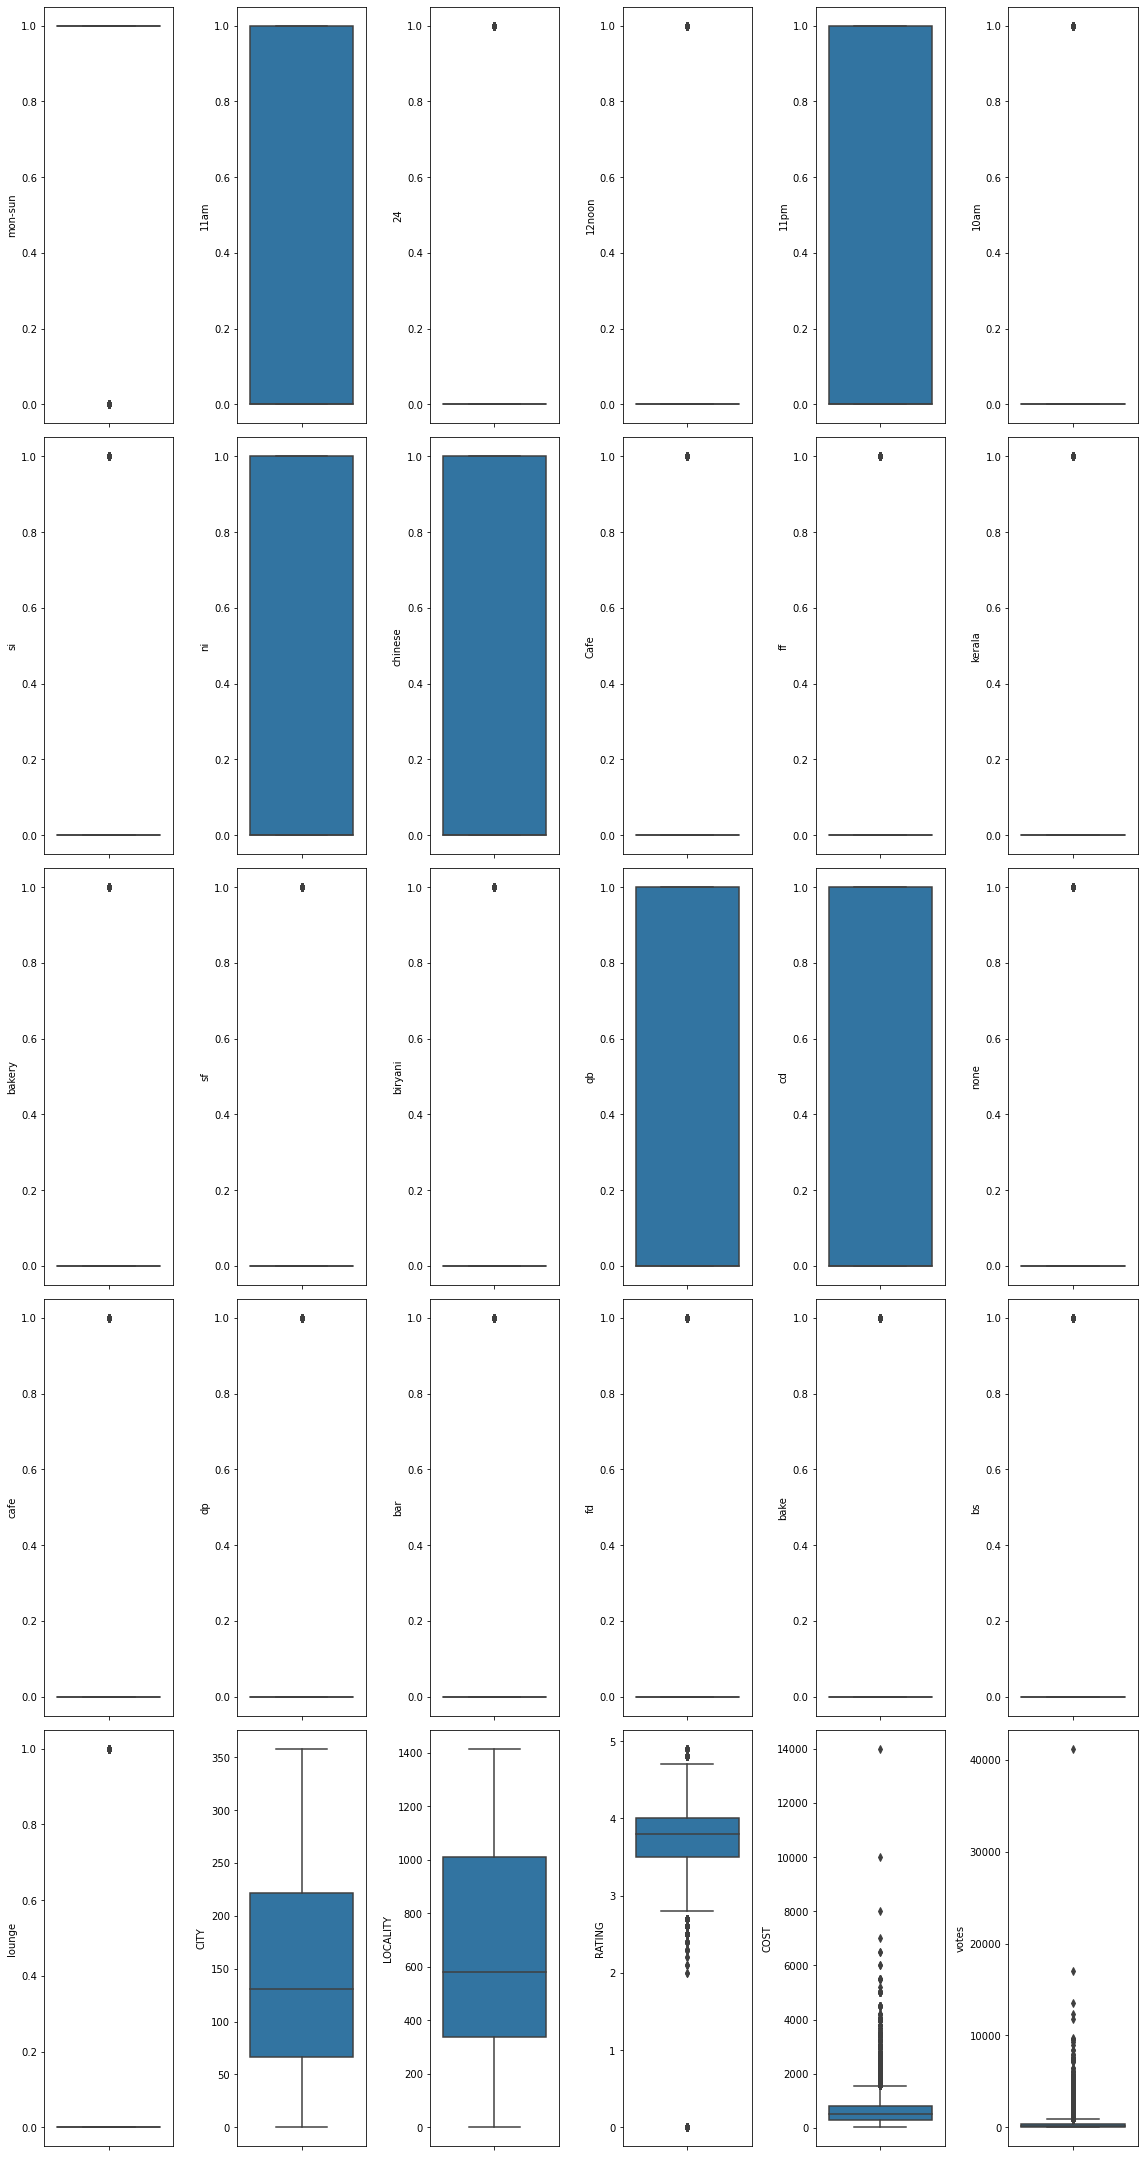

In [45]:
# Checking for outliers

collist = df_train.columns.values
ncol = 6
nrows = 6

plt.figure(figsize=(16,6*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],orient = "v")
    plt.tight_layout()


In [46]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df_train))
df_new=df_train[(z<3).all(axis=1)]
df_new.head()

,mon-sun,11am,24,12noon,11pm,10am,si,ni,chinese,Cafe,...,bar,fd,bake,bs,lounge,CITY,LOCALITY,RATING,COST,votes
RESTAURANT_ID,,,,,,,,,,,,,,,,,,,,,
9438,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,320,285,3.6,1200,49.0
6346,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,222,136,4.1,800,24.0
1249,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,119,1153,4.3,1600,1612.0
7062,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,37,142,3.9,300,101.0
10109,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,131,282,3.3,200,219.0


In [47]:
df_train.shape

(12690, 30)

In [48]:
df_new.shape

(5564, 30)

More than half the data will be dropped by removing outliers => the outliers provide relavent information => continuing df_train without removing outliers

In [49]:
# Splitting independent variables and target

x = df_train.drop('COST',axis=1)
print(x.head())
y = df_train[['COST']]
print("\n")
print(y.head())

               mon-sun  11am  24  12noon  11pm  10am  si  ni  chinese  Cafe  \
RESTAURANT_ID                                                                 
9438                 1     1   0       0     0     0   0   1        0     0   
13198                1     0   0       0     1     0   0   0        0     0   
10915                1     1   0       0     1     0   0   1        1     0   
6346                 1     0   0       0     0     0   0   0        1     0   
15387                1     1   0       0     0     0   0   0        0     0   

               ...  dp  bar  fd  bake  bs  lounge  CITY  LOCALITY  RATING  \
RESTAURANT_ID  ...                                                          
9438           ...   0    0   0     0   0       0   320       285     3.6   
13198          ...   0    1   0     0   0       0    67      1046     4.2   
10915          ...   0    0   0     0   0       0    67      1101     3.8   
6346           ...   0    0   0     0   0       0   222      

In [50]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.415074,1.72390,-0.118593,-0.543897,-0.699972,-0.275794,-0.467245,1.165084,-0.724482,-0.265395,...,-0.225873,-0.239424,-0.170382,-0.209182,-0.141473,-0.126863,2.117762,-0.920549,0.034227,-0.457395
1,0.415074,-0.58008,-0.118593,-0.543897,1.428628,-0.275794,-0.467245,-0.858307,-0.724482,-0.265395,...,-0.225873,4.176693,-0.170382,-0.209182,-0.141473,-0.126863,-0.897082,0.986239,0.662046,-0.481095
2,0.415074,1.72390,-0.118593,-0.543897,1.428628,-0.275794,-0.467245,1.165084,1.380297,-0.265395,...,-0.225873,-0.239424,-0.170382,-0.209182,-0.141473,-0.126863,-0.897082,1.124048,0.243500,-0.242855
3,0.415074,-0.58008,-0.118593,-0.543897,-0.699972,-0.275794,-0.467245,-0.858307,1.380297,-0.265395,...,-0.225873,-0.239424,-0.170382,-0.209182,-0.141473,-0.126863,0.949957,-1.293888,0.557410,-0.488579
4,0.415074,1.72390,-0.118593,-0.543897,-0.699972,-0.275794,-0.467245,-0.858307,-0.724482,-0.265395,...,4.427262,-0.239424,-0.170382,-0.209182,-0.141473,-0.126863,0.949957,-0.081161,0.243500,-0.312705


In [51]:
# standsard scalar on testing data

df_test = sc.fit_transform(df_test)
df_test = pd.DataFrame(df_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.416711,-0.569435,-0.103683,1.893136,-0.690499,-0.278724,-0.467928,1.140485,1.362664,-0.268747,...,-0.21018,-0.233637,-0.163379,-0.207716,-0.140584,-0.121949,1.336371,1.185101,0.772375,0.169698
1,0.416711,-0.569435,-0.103683,-0.528224,-0.690499,-0.278724,2.137079,1.140485,-0.733857,-0.268747,...,-0.21018,-0.233637,-0.163379,-0.207716,-0.140584,-0.121949,0.974641,-0.693424,0.665907,-0.466312
2,0.416711,1.756126,-0.103683,-0.528224,-0.690499,-0.278724,-0.467928,1.140485,1.362664,-0.268747,...,-0.21018,-0.233637,-0.163379,-0.207716,-0.140584,-0.121949,0.974641,0.115918,0.240037,-0.100891
3,-2.399747,-0.569435,-0.103683,-0.528224,-0.690499,-0.278724,-0.467928,-0.876820,-0.733857,-0.268747,...,-0.21018,-0.233637,-0.163379,-0.207716,-0.140584,-0.121949,-0.446444,0.307604,0.240037,1.283664
4,0.416711,1.756126,-0.103683,-0.528224,-0.690499,-0.278724,2.137079,-0.876820,-0.733857,-0.268747,...,-0.21018,-0.233637,-0.163379,-0.207716,-0.140584,-0.121949,0.509558,-0.356908,0.027101,-0.514361


In [52]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [54]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

In [64]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),Lasso(),Ridge()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2", r2_score(y_test,predm))
    print("rmse", np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

LinearRegression() model
0.6319252635572219
r2 0.6690016954807704
rmse 351.7796505726153


SVR() model
0.10080688391037274
r2 0.12099038432642006
rmse 573.2639628774756


DecisionTreeRegressor() model
0.9998385037776573
r2 0.43207704076886355
rmse 460.7894653844054


Lasso() model
0.6318716418010014
r2 0.6690365161663381
rmse 351.76114665491775


Ridge() model
0.6319252590037029
r2 0.6689974892115886
rmse 351.7818857429801




In [65]:
# ensemble

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
pred=rf.predict(x_test)
print("r2", r2_score(y_test,pred))
print("rmse", np.sqrt(mean_squared_error(y_test,pred)))

0.9552266715968435
r2 0.7388524760243771
rmse 312.46457325313185


In [57]:
# cross_val_score

from sklearn.model_selection import cross_val_score

cross_val_score(rf,x,y,cv=5,scoring='r2').mean()

0.6973070261520197

The cross_val_score does not indicate overfitting

In [58]:
# Saving the model

import joblib

joblib.dump(rf,'rf_food_cost.pkl')

['rf_food_cost.pkl']

In [59]:
# Loading the model

joblib_model = joblib.load('rf_food_cost.pkl')
joblib_model

RandomForestRegressor()

In [60]:
# Using the loaded model

joblib_model.fit(x_train,y_train)
y_pred = joblib_model.predict(df_test)
predicted_cost = pd.DataFrame(y_pred)
predicted_cost

,0
0,1145.500000
1,622.000000
2,660.000000
3,877.000000
4,277.100000
...,...
4226,753.500000
4227,721.500000
4228,326.500000
4229,268.391667


In [61]:
# Saving the predicted data in csv file

predicted_cost.to_csv("predicted_food_cost.csv")